# Case Study

In [1]:
#imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import hvplot.pandas
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
#import and clean raw data

from pathlib import Path

data_path = Path('../Resources/Assignment Data (Quant Strategist - Los Angelesl).csv')
raw_data = pd.read_csv(data_path, header=3, index_col='Date', encoding='cp1252')
raw_data = raw_data.loc[:, ~raw_data.columns.str.contains('^Unnamed')]
raw_data.dropna(inplace=True)
raw_data.index = pd.to_datetime(raw_data.index)

In [3]:
data = raw_data.assign(x=raw_data['Gold Price Index']/raw_data['Copper Price Index'].values)

In [4]:
data = raw_data
data['Gold/Copper Index'] = data['Gold Price Index'] / data['Copper Price Index']

In [5]:
data.head()

Gold Price Index  Copper Price Index  \
Date                                               
2000-06-09            290.78               80.37   
2000-06-12            293.22               80.11   
2000-06-13            291.98               80.86   
2000-06-14            297.83               81.72   
2000-06-15            295.69               82.54   

            Gold Excess Return Index (Excess of Cash)  \
Date                                                    
2000-06-09                                      44.94   
2000-06-12                                      45.35   
2000-06-13                                      45.20   
2000-06-14                                      46.14   
2000-06-15                                      45.81   

            Copper Excess Return Index  (Excess of Cash)  \
Date                                                       
2000-06-09                                        111.00   
2000-06-12                                        110.57   
2000-06-13                                        111.54   
2000-06-14                                        112.63   
2000-06-15                                        113.77   

            United States 10 Year Treasury Note, Constant Maturity, Total Return Index  \
Date                                                                                     
2000-06-09                                             261.12                            
2000-06-12                                             261.86                            
2000-06-13                                             261.48                            
2000-06-14                                             262.54                            
2000-06-15                                             262.62                            

            United States 30 Year Treasury Bond, Constant Maturity, Total Return Index   \
Date                                                                                      
2000-06-09                                             283.57                             
2000-06-12                                             283.99                             
2000-06-13                                             281.52                             
2000-06-14                                             282.70                             
2000-06-15                                             282.20                             

            Treasury Repo Rate  \
Date                             
2000-06-09                6.64   
2000-06-12                6.65   
2000-06-13                6.65   
2000-06-14                6.58   
2000-06-15                6.65   

            United States 10 Year Treasury Note, Constant Maturity, Excess Return Index (Excess of Cash)  \
Date                                                                                                       
2000-06-09                                             100.00                                              
2000-06-12                                             100.26                                              
2000-06-13                                             100.09                                              
2000-06-14                                             100.47                                              
2000-06-15                                             100.47                                              

            United States 30 Year Treasury Bond, Constant Maturity, Excess Return Index (Excess of Cash)  \
Date                                                                                                       
2000-06-09                                             100.00                                              
2000-06-12                                             100.12                                              
2000-06-13                                              99.23                                              
2000-06-14           

In [6]:
data.hvplot(x='Date', y=['Gold/Copper Index', 'United States 10 year Treasury Mid Yield'])


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [7]:
for col in data.columns:
    print(col)
    


Gold Price Index
Copper Price Index
Gold Excess Return Index (Excess of Cash)
Copper Excess Return Index  (Excess of Cash)
United States 10 Year Treasury Note, Constant Maturity, Total Return Index
United States 30 Year Treasury Bond, Constant Maturity, Total Return Index 
Treasury Repo Rate
United States 10 Year Treasury Note, Constant Maturity, Excess Return Index (Excess of Cash)
United States 30 Year Treasury Bond, Constant Maturity, Excess Return Index (Excess of Cash)
United States 10 year Treasury Mid Yield
United States 30 year Treasury Mid Yield
United States 10 year Treasury Modified Duration
United States 30 year Treasury Modified Duration
Gold/Copper Index


In [8]:
#data["United States 30 Year Treasury Bond, Constant Maturity, Total Return Index"].dtypes
colList = []

for col in data.columns:
    colList.append(col.replace(',', ''))
    

In [9]:
data.columns = colList
data.columns

Index(['Gold Price Index', 'Copper Price Index',
       'Gold Excess Return Index (Excess of Cash)',
       'Copper Excess Return Index  (Excess of Cash)',
       'United States 10 Year Treasury Note Constant Maturity Total Return Index',
       'United States 30 Year Treasury Bond Constant Maturity Total Return Index ',
       'Treasury Repo Rate',
       'United States 10 Year Treasury Note Constant Maturity Excess Return Index (Excess of Cash)',
       'United States 30 Year Treasury Bond Constant Maturity Excess Return Index (Excess of Cash)',
       'United States 10 year Treasury Mid Yield',
       'United States 30 year Treasury Mid Yield',
       'United States 10 year Treasury Modified Duration',
       'United States 30 year Treasury Modified Duration',
       'Gold/Copper Index'],
      dtype='object')

In [10]:
print(data.iloc[0])

Gold Price Index                                                                              290.780000
Copper Price Index                                                                             80.370000
Gold Excess Return Index (Excess of Cash)                                                      44.940000
Copper Excess Return Index  (Excess of Cash)                                                  111.000000
United States 10 Year Treasury Note Constant Maturity Total Return Index                      261.120000
United States 30 Year Treasury Bond Constant Maturity Total Return Index                      283.570000
Treasury Repo Rate                                                                              6.640000
United States 10 Year Treasury Note Constant Maturity Excess Return Index (Excess of Cash)    100.000000
United States 30 Year Treasury Bond Constant Maturity Excess Return Index (Excess of Cash)    100.000000
United States 10 year Treasury Mid Yield               

In [11]:
#correlation matrix
corrM = data.corr()
corrM

Gold Price Index  \
Gold Price Index                                            1.000000   
Copper Price Index                                          0.780404   
Gold Excess Return Index (Excess of Cash)                   0.995614   
Copper Excess Return Index  (Excess of Cash)                0.708851   
United States 10 Year Treasury Note Constant Ma...          0.903146   
United States 30 Year Treasury Bond Constant Ma...          0.838313   
Treasury Repo Rate                                         -0.596361   
United States 10 Year Treasury Note Constant Ma...          0.868683   
United States 30 Year Treasury Bond Constant Ma...          0.806529   
United States 10 year Treasury Mid Yield                   -0.877842   
United States 30 year Treasury Mid Yield                   -0.843107   
United States 10 year Treasury Modified Duration            0.872856   
United States 30 year Treasury Modified Duration            0.863283   
Gold/Copper Index                                           0.486765   

                                                    Copper Price Index  \
Gold Price Index                                              0.780404   
Copper Price Index                                            1.000000   
Gold Excess Return Index (Excess of Cash)                     0.802706   
Copper Excess Return Index  (Excess of Cash)                  0.990298   
United States 10 Year Treasury Note Constant Ma...            0.561758   
United States 30 Year Treasury Bond Constant Ma...            0.460688   
Treasury Repo Rate                                           -0.257655   
United States 10 Year Treasury Note Constant Ma...            0.485743   
United States 30 Year Treasury Bond Constant Ma...            0.405829   
United States 10 year Treasury Mid Yield                     -0.479630   
United States 30 year Treasury Mid Yield                     -0.455983   
United States 10 year Treasury Modified Duration              0.511469   
United States 30 year Treasury Modified Duration              0.492849   
Gold/Copper Index                                            -0.135622   

                                                    Gold Excess Return Index (Excess of Cash)  \
Gold Price Index                                                                     0.995614   
Copper Price Index                                                                   0.802706   
Gold Excess Return Index (Excess of Cash)                                            1.000000   
Copper Excess Return Index  (Excess of Cash)                                         0.738466   
United States 10 Year Treasury Note Constant Ma...                                   0.867853   
United States 30 Year Treasury Bond Constant Ma...                                   0.792047   
Treasury Repo Rate                                                                  -0.603272   
United States 10 Year Treasury Note Constant Ma...                                   0.833177   
United States 30 Year Treasury Bond Constant Ma...                                   0.759581   
United States 10 year Treasury Mid Yield                                            -0.858153   
United States 30 year Treasury Mid Yield                                            -0.807990   
United States 10 year Treasury Modified Duration                                     0.855629   
United States 30 year Treasury Modified Duration                                     0.826131   
Gold/Copper Index                                                                    0.445753   

                                                    Copper Excess Return Index  (Excess of Cash)  \
Gold Price Index                                                                        0.708851   
Copper Price Index                                                                      0.990298   
Gold Excess Return Index (Excess of Cash)                                               0.738466   
Copp

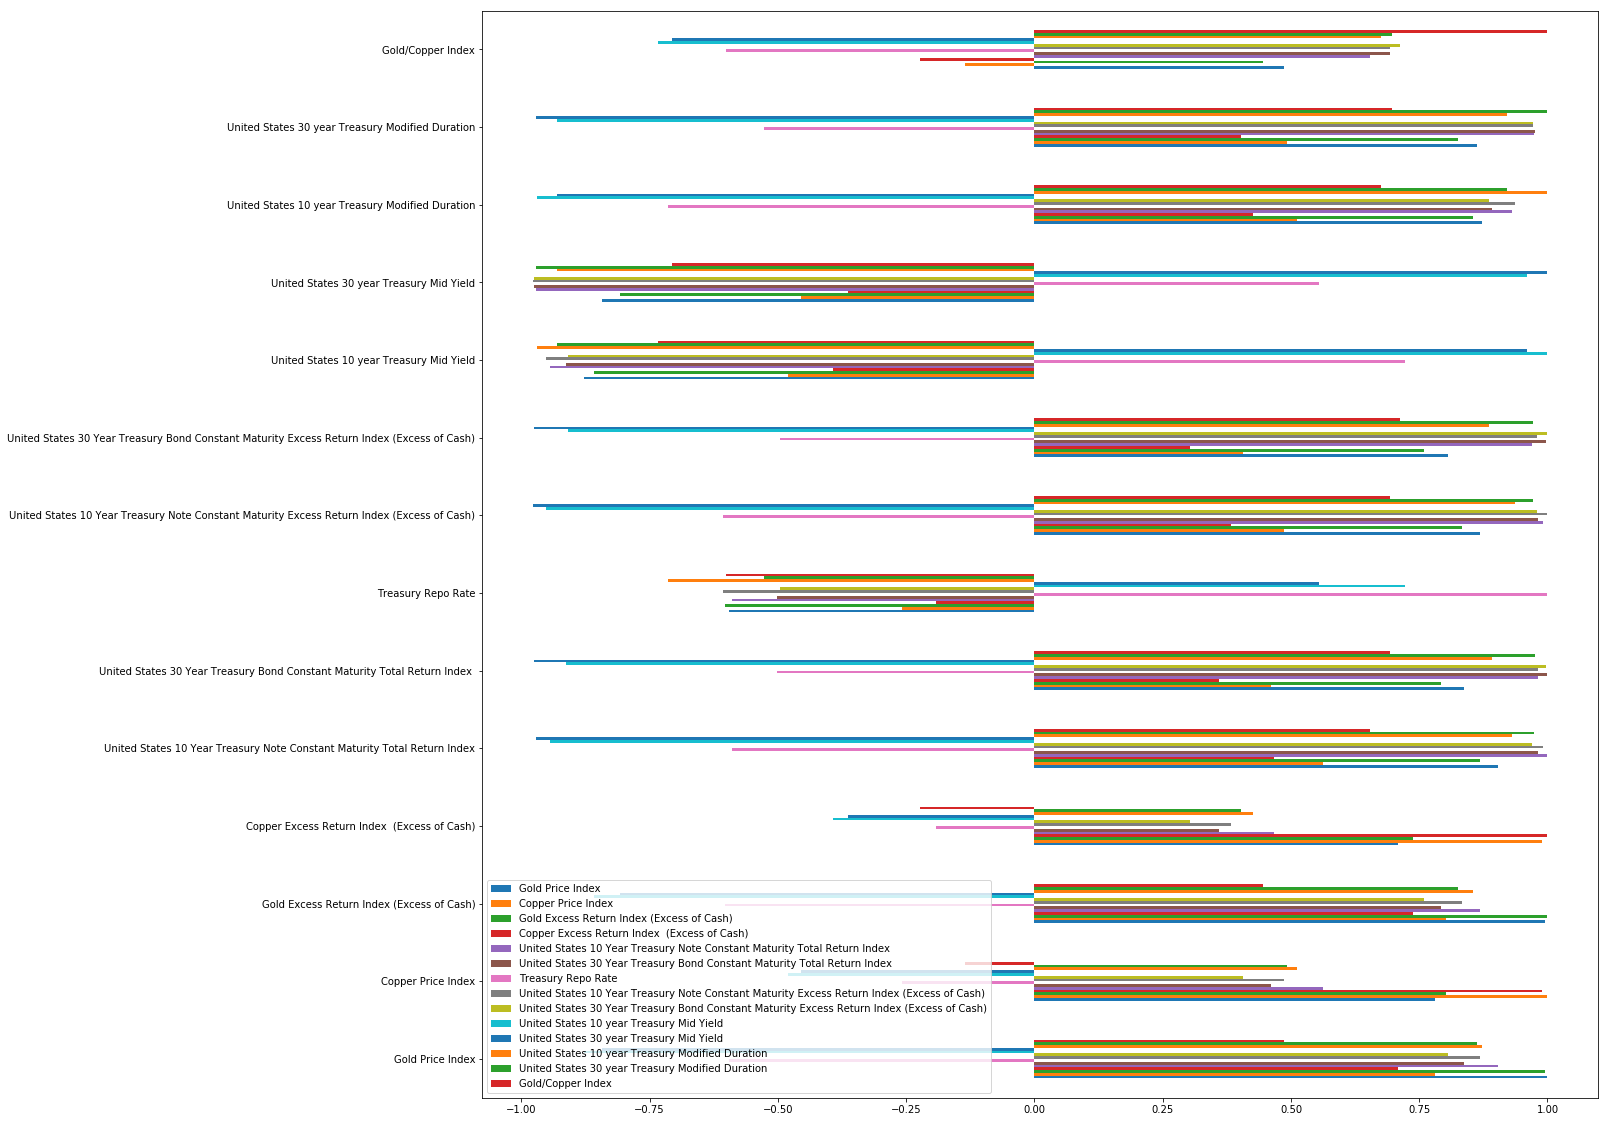

In [33]:
corrM.plot.barh(figsize=(20, 20))

In [16]:
import seaborn as sns
corrM.style.background_gradient(cmap='coolwarm')

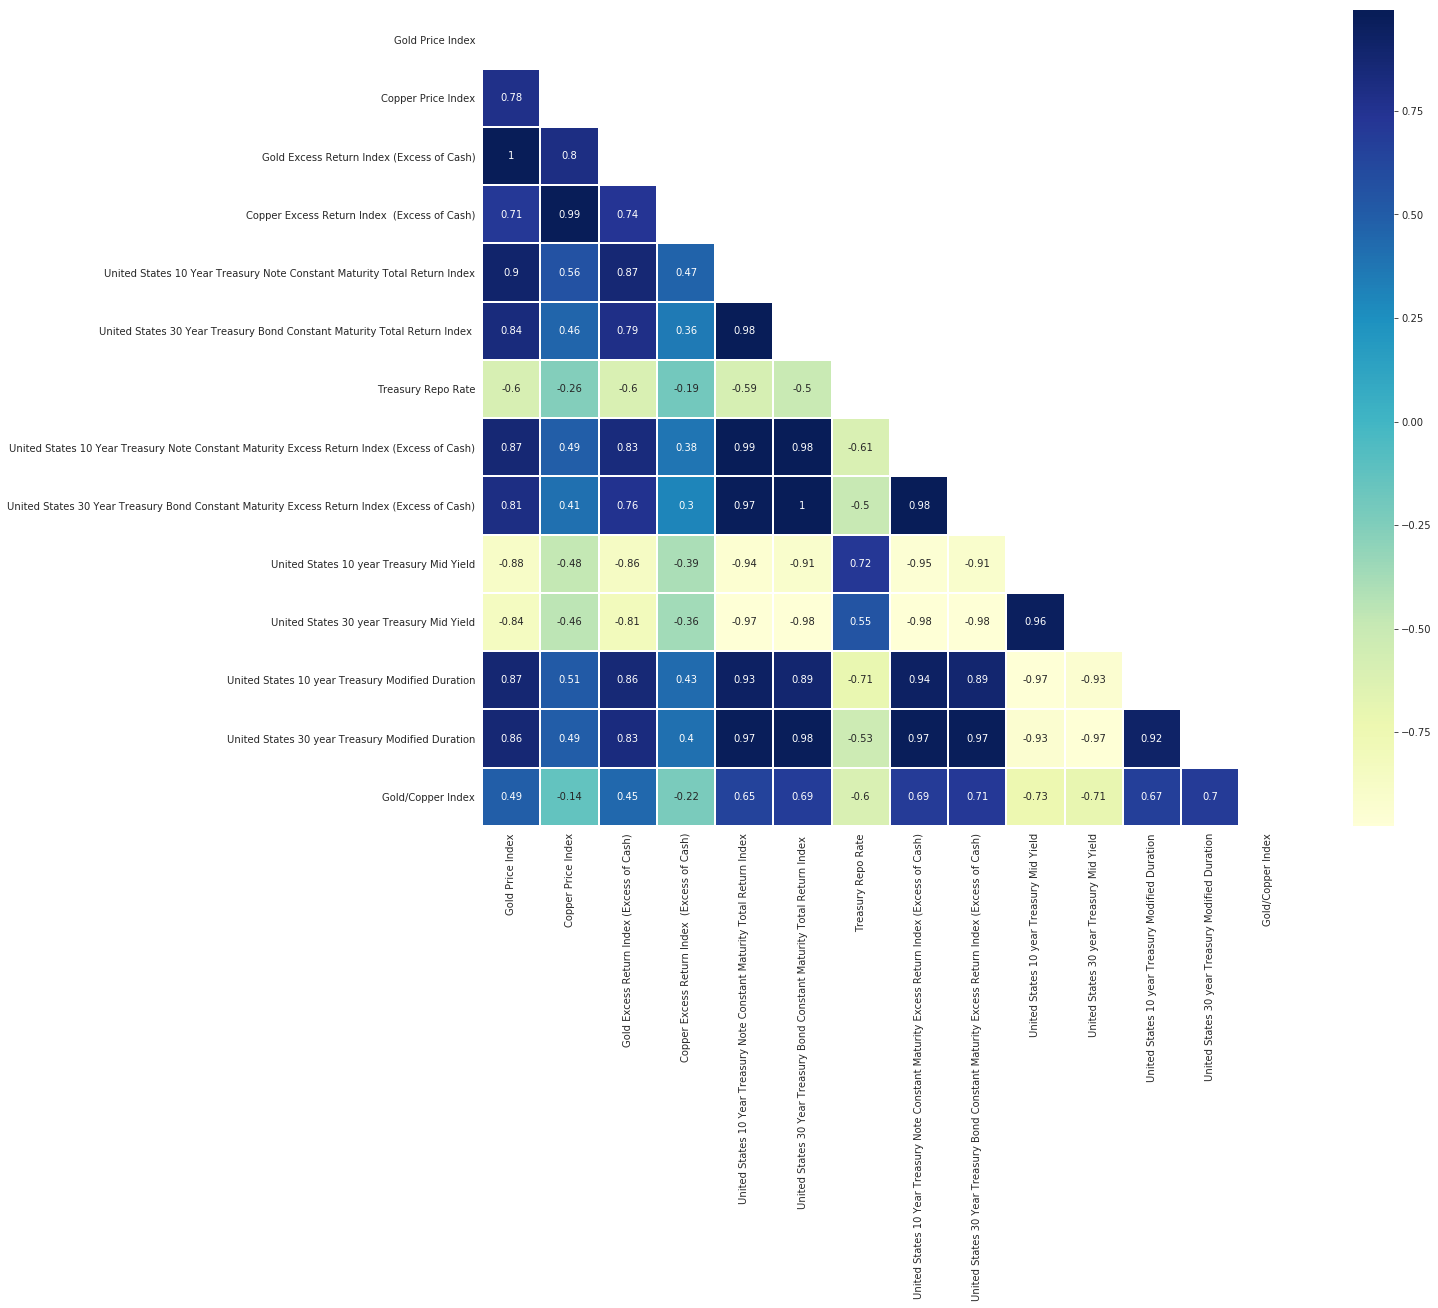

In [44]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corrM)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(corrM, mask=mask, center=0, annot=True, square=True, linewidths=1, cmap="YlGnBu", robust=True)

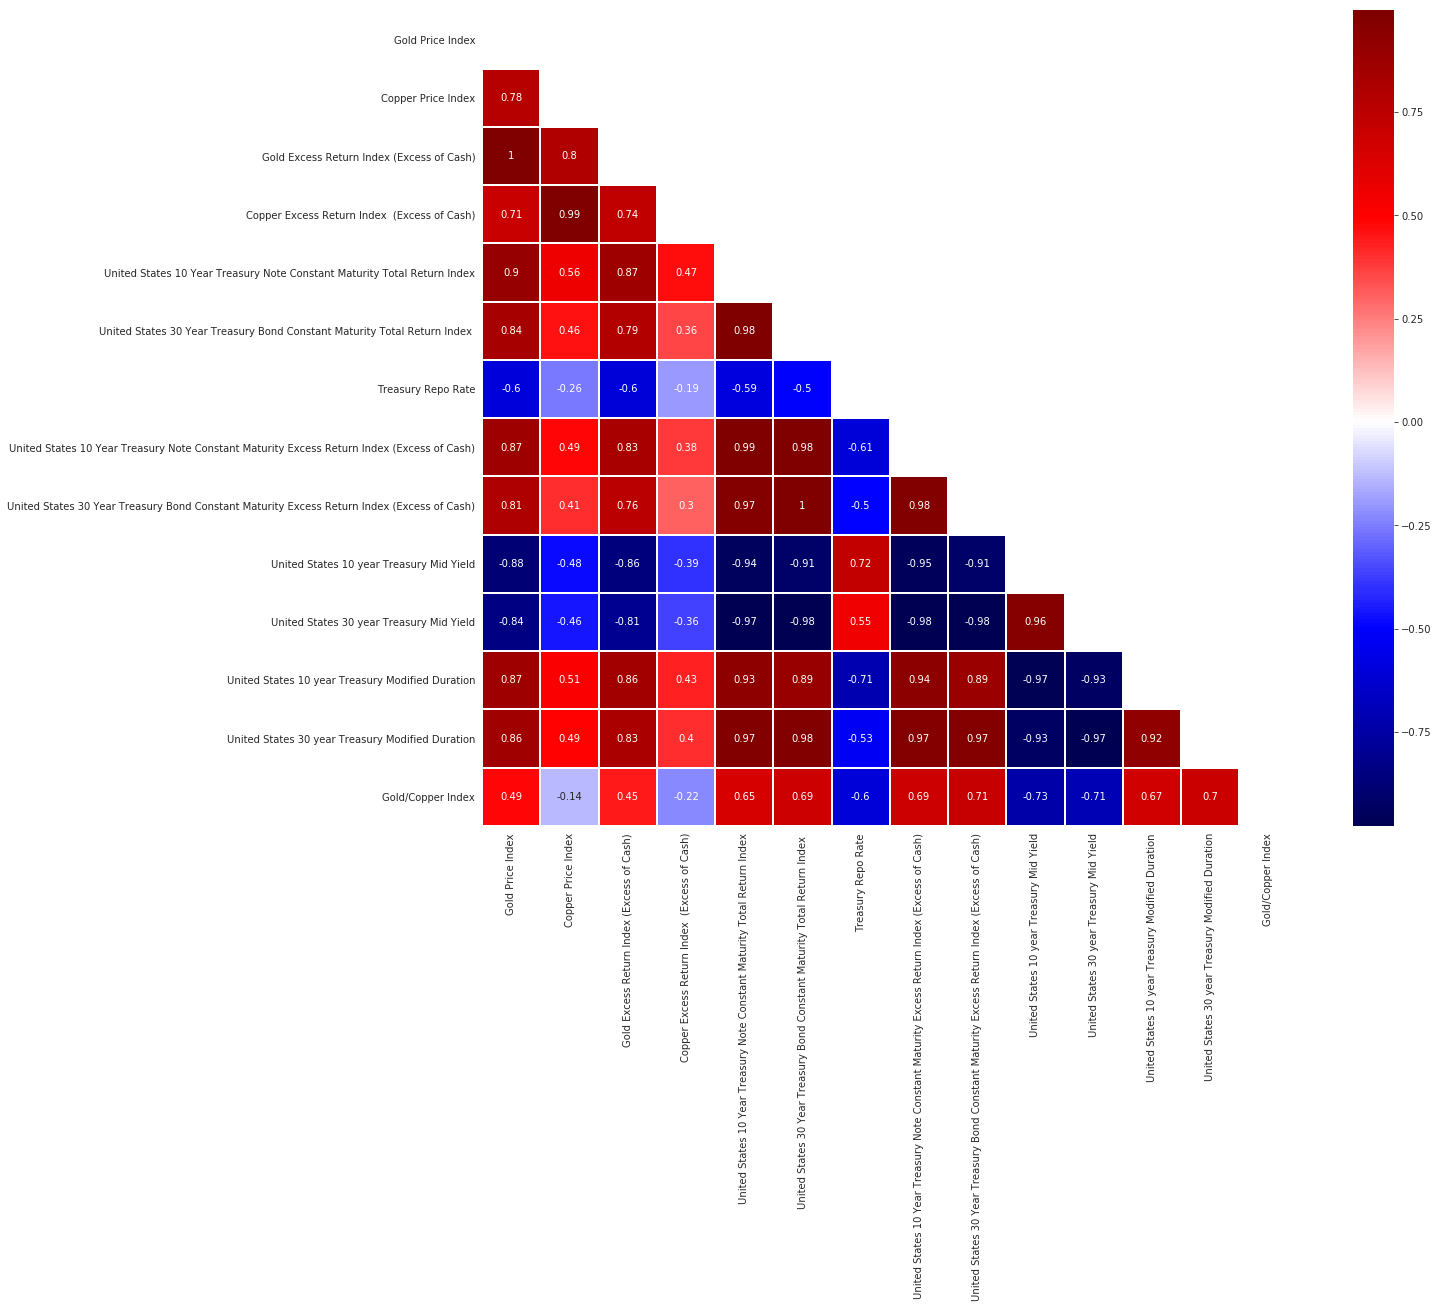

In [47]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corrM)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(corrM, mask=mask, center=0, annot=True, square=True, linewidths=1, cmap="seismic")